# Lecture 6.2
*Digging into the STFT*

## Import Libraries

In [1]:
import librosa
import numpy as np
import IPython.display as ipd

import matplotlib.pyplot as plt
# Weird hack to get librosa.display to work properly
import librosa as _librosa
import librosa.display as _display
_librosa.display = _display

## Load Audio File

In [2]:
filename = "Sounds/Plucked Bass.wav"
#filename = "Sounds/Sinatra.wav"
#filename = "Sounds/Police 44.1kHz.wav"

# Default will import at 22.050 kHz, force to file's rate with sr=None
y_all, sr = librosa.load(filename,sr=None)
sr

44100

In [3]:
ipd.Audio(y_all, rate = sr)

In [4]:
num_samples = np.size(y_all)
num_samples

55713

In [5]:
duration = num_samples/sr
duration

1.2633333333333334

In [6]:
y = y_all
#y = y_all[:sr*15]
np.size(y)

55713

In [7]:
ipd.Audio(y, rate = sr)

In [8]:
n_fft = 2048
frame_duration = n_fft/sr
frame_duration # in seconds

0.046439909297052155

In [9]:
freq_spacing = sr/n_fft
freq_spacing # in Hz

21.533203125

## Compute and plot the STFT 

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

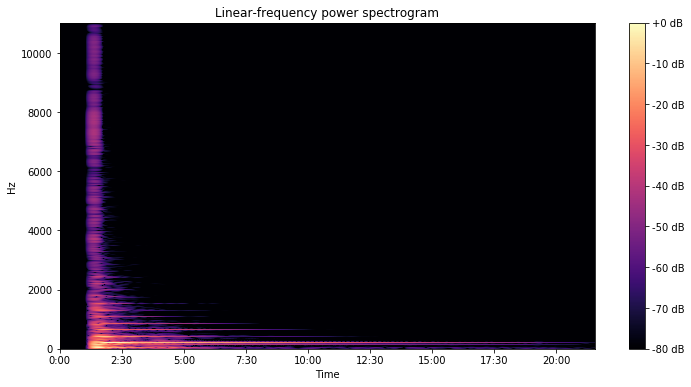

In [14]:
# set the hop size
window_length = n_fft
hop_length = 1

#compute the stft of y and store it in S1
S1 = librosa.stft(y, n_fft, hop_length, window_length)
SdB1 = librosa.amplitude_to_db(np.abs(S1),ref=np.max)
plt.figure(figsize=(12, 6))
ax = librosa.display.specshow(SdB1,x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
#ax.set_xlim([0,0.25])
#ax.set_ylim([0,5000])

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

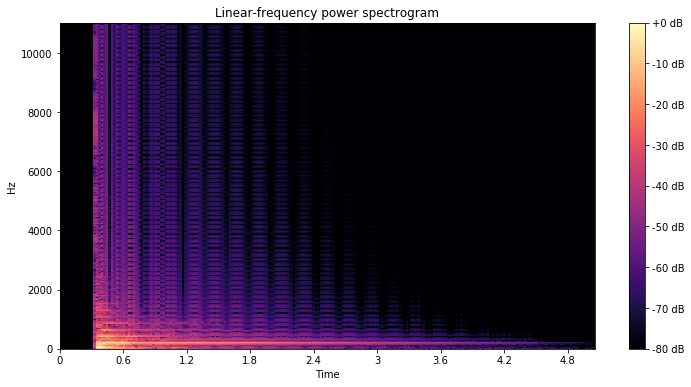

In [11]:
# set the hop size
window_length = 512
hop_length = 256
window_type = 'boxcar'

#compute the stft of y and store it in D
# take the transpose of D so that time frames is the first dimension
S2 = librosa.stft(y, n_fft, hop_length, window_length, window_type)
SdB2 = librosa.amplitude_to_db(np.abs(S2),ref=np.max)
plt.figure(figsize=(12, 6))
ax2 = librosa.display.specshow(SdB2,x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
#ax2.set_xlim([0,0.25])
#ax2.set_ylim([0,5000])

Text(0.5, 1.0, 'Power spectrogram')

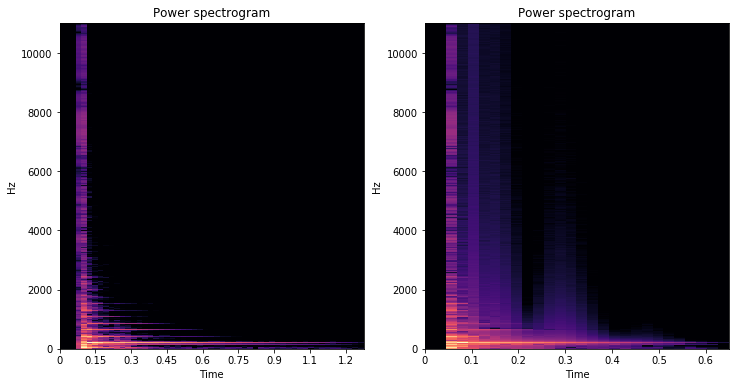

In [12]:
# set the hop size
window_length = n_fft
hop_length = 1024

#compute the stft of y and store it in S1
S1 = librosa.stft(y, n_fft, hop_length, window_length)
SdB1 = librosa.amplitude_to_db(np.abs(S1),ref=np.max)
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
ax = librosa.display.specshow(SdB1,x_axis='time',y_axis='linear')
#plt.colorbar(format='%+2.0f dB')
plt.title('Power spectrogram')
#ax.set_xlim([0,0.25])
#ax.set_ylim([0,1000])

window_length = n_fft
hop_length = n_fft
window_type = 'boxcar'

#compute the stft of y and store it in D
# take the transpose of D so that time frames is the first dimension
S2 = librosa.stft(y, n_fft, hop_length, window_length, window_type)
SdB2 = librosa.amplitude_to_db(np.abs(S2),ref=np.max)
plt.subplot(1,2,2)
ax2 = librosa.display.specshow(SdB2,x_axis='time',y_axis='linear')
#plt.colorbar(format='%+2.0f dB')
plt.title('Power spectrogram')
#ax2.set_xlim([0,0.25])
#ax2.set_ylim([0,1000])